In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
customerinfo = pd.read_parquet(r'C:\Users\hp\Downloads\olist_customers_dataset.parquet')
customerlocation = pd.read_parquet(r'C:\Users\hp\Downloads\olist_geolocation_dataset.parquet')
customerorderitems = pd.read_parquet(r'C:\Users\hp\Downloads\olist_order_items_dataset.parquet')
customerpayments = pd.read_parquet(r'C:\Users\hp\Downloads\olist_order_payments_dataset.parquet')
customerreviews = pd.read_parquet(r'C:\Users\hp\Downloads\olist_order_reviews_dataset.parquet')
customerorders = pd.read_parquet(r'C:\Users\hp\Downloads\olist_orders_dataset.parquet')
customerproducts = pd.read_parquet(r'C:\Users\hp\Downloads\olist_products_dataset.parquet')
sellers = pd.read_parquet(r'C:\Users\hp\Downloads\olist_sellers_dataset.parquet')
productcategory = pd.read_parquet(r'C:\Users\hp\Downloads\product_category_name_translation.parquet')


In [3]:
customerlocation.rename(columns={'geolocation_zip_code_prefix' : 'seller_zip_code_prefix'},inplace=True)

In [4]:
merged_dataset = pd.merge(customerinfo,customerorders,on="customer_id", how="inner")
merged_dataset = pd.merge(merged_dataset,customerorderitems,on="order_id", how="inner")
merged_dataset = pd.merge(merged_dataset,customerproducts,on="product_id", how="left")
merged_dataset = pd.merge(merged_dataset, customerpayments, on="order_id", how="inner")
merged_dataset = pd.merge(merged_dataset, customerreviews, on="order_id", how="left")
merged_dataset = pd.merge(merged_dataset,sellers,on="seller_id", how="inner")
merged_dataset = pd.merge(merged_dataset, customerlocation,on="seller_zip_code_prefix", how="left")

In [5]:
print(merged_dataset.duplicated().sum()) 

4208394


In [6]:
merged_dataset.drop_duplicates(subset=['order_id', 'product_id'], inplace=True)

In [7]:
merged_dataset.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],

In [8]:
print(merged_dataset.isnull().sum())

customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date      1028
order_delivered_customer_date     2230
order_estimated_delivery_date        0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name             1460
product_name_lenght               1460
product_description_lenght        1460
product_photos_qty                1460
product_weight_g                    16
product_length_cm                   16
product_height_cm                   16
product_width_cm         

In [9]:
selected_columns = [
    "customer_id", "customer_unique_id", "customer_city", "customer_state",
    "order_id", "order_status", "order_purchase_timestamp", "order_delivered_customer_date",
    "order_estimated_delivery_date", "product_id", "product_category_name", 
    "price", "freight_value", "seller_id", "seller_state", 
    "payment_type", "payment_installments", "payment_value", 
    "review_score"
]
cleaned_data = merged_dataset[selected_columns]
cleaned_data.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name,price,freight_value,seller_id,seller_state,payment_type,payment_installments,payment_value,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05 00:00:00,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,124.99,21.88,7c67e1448b00f6e969d365cea6b010ab,SP,credit_card,2,146.87,4.0
139,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06 00:00:00,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,289.00,46.48,b8bc237ba3788b23da09c0f1f3a3288c,SC,credit_card,8,335.48,5.0
310,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13 00:00:00,bd07b66896d6f1494f5b86251848ced7,moveis_escritorio,139.94,17.79,7c67e1448b00f6e969d365cea6b010ab,SP,credit_card,7,157.73,5.0
449,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10 00:00:00,a5647c44af977b148e0a3a4751a09e2e,moveis_escritorio,149.94,23.36,7c67e1448b00f6e969d365cea6b010ab,SP,credit_card,1,173.30,5.0
588,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15 00:00:00,9391a573abe00141c56e38d84d7d5b3b,casa_conforto,230.00,22.25,4a3ca9315b744ce9f8e9374361493884,SP,credit_card,8,252.25,5.0


In [10]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102424 entries, 0 to 17093014
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    102424 non-null  object 
 1   customer_unique_id             102424 non-null  object 
 2   customer_city                  102424 non-null  object 
 3   customer_state                 102424 non-null  object 
 4   order_id                       102424 non-null  object 
 5   order_status                   102424 non-null  object 
 6   order_purchase_timestamp       102424 non-null  object 
 7   order_delivered_customer_date  100194 non-null  object 
 8   order_estimated_delivery_date  102424 non-null  object 
 9   product_id                     102424 non-null  object 
 10  product_category_name          100964 non-null  object 
 11  price                          102424 non-null  float64
 12  freight_value                  10

In [11]:
cleaned_data.describe()

,price,freight_value,payment_installments,payment_value,review_score
count,102424.000000,102424.000000,102424.000000,102424.000000,101627.000000
mean,124.422782,20.111321,2.959970,161.661272,4.077076
std,188.926843,15.884685,2.747002,220.657001,1.353516
min,0.850000,0.000000,0.000000,0.010000,1.000000
25%,40.000000,13.140000,1.000000,61.380000,4.000000
50%,78.800000,16.320000,2.000000,105.880000,5.000000
75%,139.000000,21.220000,4.000000,179.990000,5.000000
max,6735.000000,409.680000,24.000000,13664.080000,5.000000


In [12]:
cleaned_data = pd.merge(cleaned_data,productcategory,on='product_category_name',how='left')

In [13]:
cleaned_data = cleaned_data.drop(columns=['product_category_name'])

In [14]:
bestselling_product = cleaned_data.groupby('product_category_name_english')['order_id'].count().rename("total_sales").reset_index()

bestselling_product = bestselling_product.sort_values(by='total_sales', ascending=False).reset_index()
top10_product = bestselling_product.head(10)

C:\Users\hp\AppData\Local\Temp\ipykernel_9760\2068257913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_product, x='product_category_name_english', y='total_sales', palette='viridis')


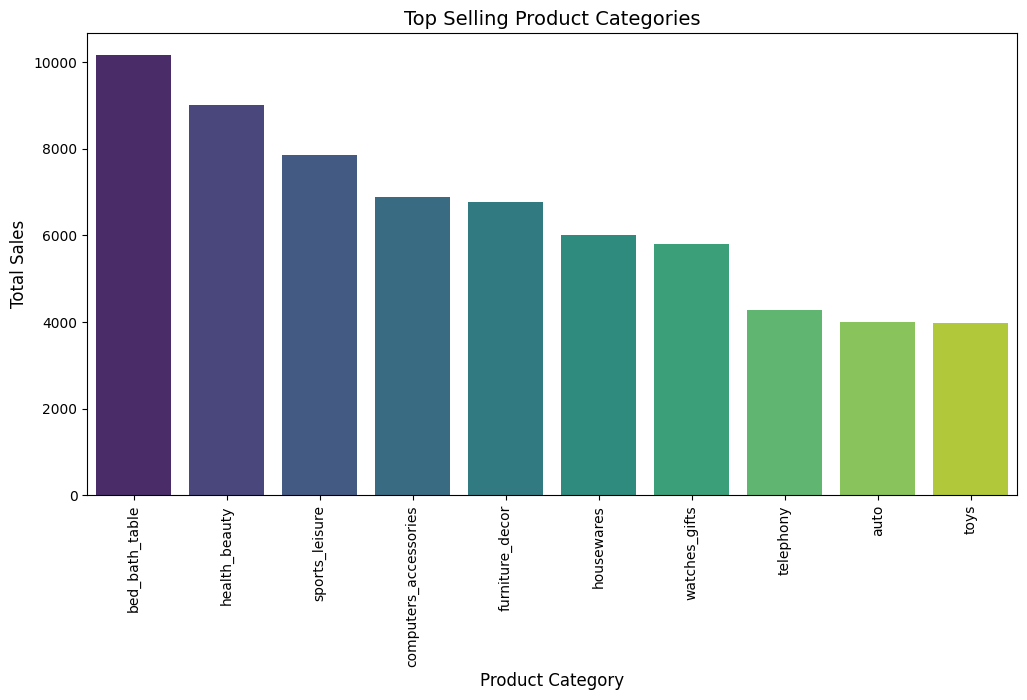

In [15]:

plt.figure(figsize=(12, 6))
sns.barplot(data=top10_product, x='product_category_name_english', y='total_sales', palette='viridis')

plt.xticks(rotation=90)

plt.title("Top Selling Product Categories", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

plt.show()

In [16]:
cleaned_data.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'product_id', 'price', 'freight_value', 'seller_id', 'seller_state',
       'payment_type', 'payment_installments', 'payment_value', 'review_score',
       'product_category_name_english'],
      dtype='object')

In [17]:
import duckdb as db

top_revenue_products = db.query("""
WITH product_sales AS (
    SELECT 
        product_category_name_english, 
        AVG(price) AS avg_price,
        COUNT(order_id) AS estimated_quantity  
    FROM cleaned_data
    WHERE price > 0
    GROUP BY product_category_name_english
)
SELECT 
    ps.product_category_name_english, 
    ps.avg_price, 
    ps.estimated_quantity, 
    ps.estimated_quantity * ps.avg_price AS total_revenue
FROM product_sales ps
ORDER BY total_revenue DESC
""").df()

top_revenue_products.head(100)

,product_category_name_english,avg_price,estimated_quantity,total_revenue
0,health_beauty,134.364808,9021,1212104.93
1,watches_gifts,204.782542,5799,1187533.96
2,bed_bath_table,94.834635,10160,963519.89
3,sports_leisure,118.258013,7858,929271.47
4,computers_accessories,117.106887,6887,806515.13
...,...,...,...,...
67,flowers,33.204828,29,962.94
68,home_comfort_2,28.452917,24,682.87
69,cds_dvds_musicals,53.333333,12,640.00
70,fashion_childrens_clothes,71.231250,8,569.85


In [18]:
print(top_revenue_products['total_revenue'].sum())
print(cleaned_data['price'].sum())

12743879.01000016
12743879.009999998


C:\Users\hp\AppData\Local\Temp\ipykernel_9760\1652970603.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, x="product_category_name_english", y="total_revenue", palette="viridis")


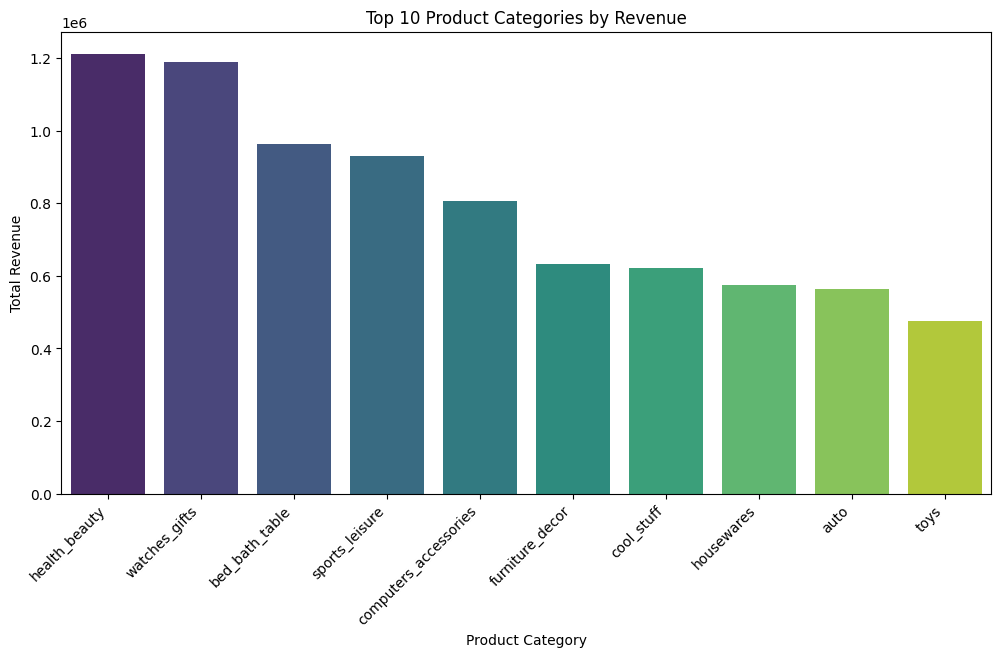

In [19]:

top_categories = top_revenue_products.sort_values(by="total_revenue", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_categories, x="product_category_name_english", y="total_revenue", palette="viridis")

# Customizing the chart
plt.xticks(rotation=45, ha='right')  # Rotate X labels for better readability
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.title("Top 10 Product Categories by Revenue")

# Show plot
plt.show()

In [20]:
cleaned_data.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'product_id', 'price', 'freight_value', 'seller_id', 'seller_state',
       'payment_type', 'payment_installments', 'payment_value', 'review_score',
       'product_category_name_english'],
      dtype='object')

In [21]:
cleaned_data['order_purchase_timestamp'].head()

0    2017-05-16 15:05:35
1    2018-01-12 20:48:24
2    2018-05-19 16:07:45
3    2018-03-13 16:06:38
4    2018-07-29 09:51:30
Name: order_purchase_timestamp, dtype: object

In [22]:
cleaned_data['order_purchase_timestamp'] = pd.to_datetime(cleaned_data['order_purchase_timestamp'])

In [23]:
cleaned_data['order_purchase_timestamp'].head()

0   2017-05-16 15:05:35
1   2018-01-12 20:48:24
2   2018-05-19 16:07:45
3   2018-03-13 16:06:38
4   2018-07-29 09:51:30
Name: order_purchase_timestamp, dtype: datetime64[ns]

In [24]:
#extract month
cleaned_data['month'] = cleaned_data['order_purchase_timestamp'].dt.month

# Extract day
cleaned_data['day'] = cleaned_data['order_purchase_timestamp'].dt.day

# Extract time
cleaned_data['time'] = cleaned_data['order_purchase_timestamp'].dt.time

cleaned_data['time'] = pd.to_datetime(cleaned_data['time'], format='%H:%M:%S')

# Extract hour
cleaned_data['hour'] = cleaned_data['time'].dt.hour

# Extract weekday as an integer (Monday=0, Sunday=6)
cleaned_data['weekday_number'] = cleaned_data['order_purchase_timestamp'].dt.weekday

# Extract weekday name
cleaned_data['weekday_name'] = cleaned_data['order_purchase_timestamp'].dt.day_name()

In [25]:
monthly_sales = db.query('''
select month,count(order_id) as total_orders
from cleaned_data
group by month
order by month 
''').df()
monthly_sales.head()

,month,total_orders
0,1,8340
1,2,8666
2,3,10148
3,4,9697
4,5,10920


C:\Users\hp\AppData\Local\Temp\ipykernel_9760\1508667928.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x="month", y="total_orders", palette="viridis")


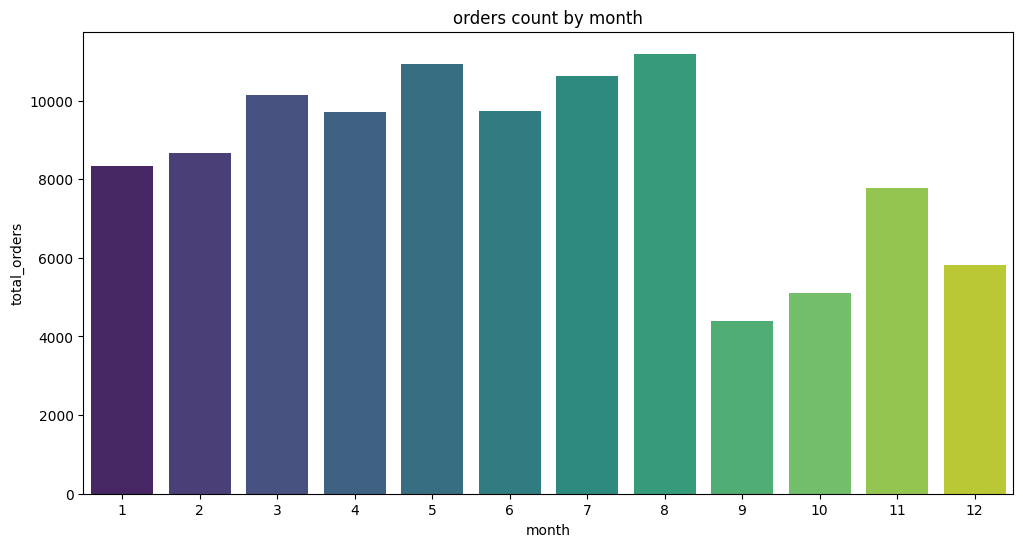

In [26]:


plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x="month", y="total_orders", palette="viridis")

# Customizing the chart
plt.xlabel("month")
plt.ylabel("total_orders")
plt.title("orders count by month")

# Show plot
plt.show()

In [27]:
hourly_sales = db.query('''
select hour,count(order_id) as total_orders
from cleaned_data
group by hour
order by hour
''').df()
hourly_sales.head(2)

,hour,total_orders
0,0,2475
1,1,1199


C:\Users\hp\AppData\Local\Temp\ipykernel_9760\2928843822.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_sales, x="hour", y="total_orders", palette="viridis")


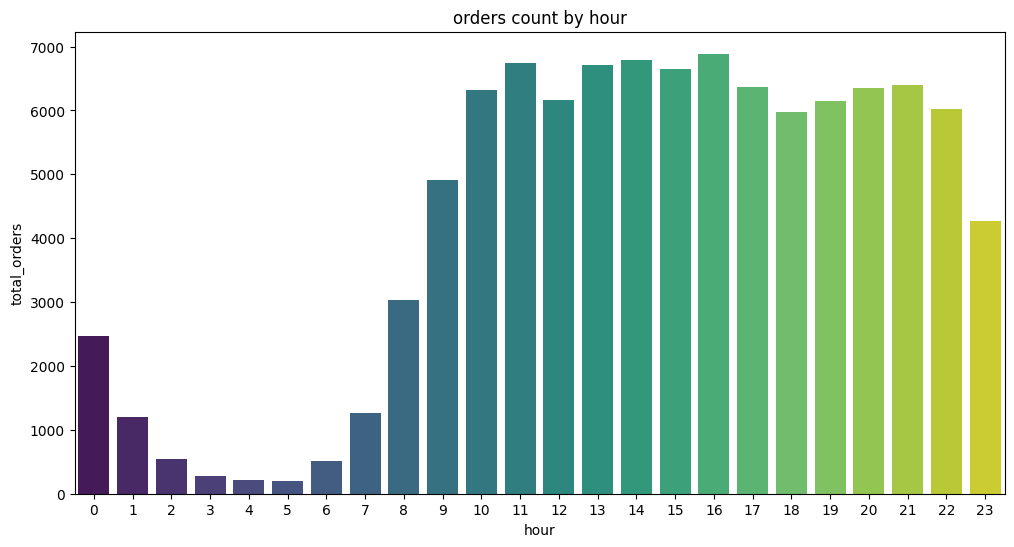

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_sales, x="hour", y="total_orders", palette="viridis")

# Customizing the chart
plt.xlabel("hour")
plt.ylabel("total_orders")
plt.title("orders count by hour")

# Show plot
plt.show()

In [29]:
weekday_orders = db.query('''
select weekday_name as weekdays,count(order_id) total_orders
from cleaned_data
group by weekday_name
order by weekday_name
''').df()
weekday_orders.head()

,weekdays,total_orders
0,Friday,14565
1,Monday,16683
2,Saturday,11255
3,Sunday,12363
4,Thursday,15184


In [30]:
from pandas.api.types import CategoricalDtype
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=weekday_order, ordered=True)
weekday_orders['weekdays'] = weekday_orders['weekdays'].astype(cat_type)
weekday_orders.sort_values('weekdays', inplace=True)
weekday_orders.head(7)

,weekdays,total_orders
1,Monday,16683
5,Tuesday,16448
6,Wednesday,15926
4,Thursday,15184
0,Friday,14565
2,Saturday,11255
3,Sunday,12363


C:\Users\hp\AppData\Local\Temp\ipykernel_9760\1571816774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_orders, x="weekdays", y="total_orders", palette="viridis")


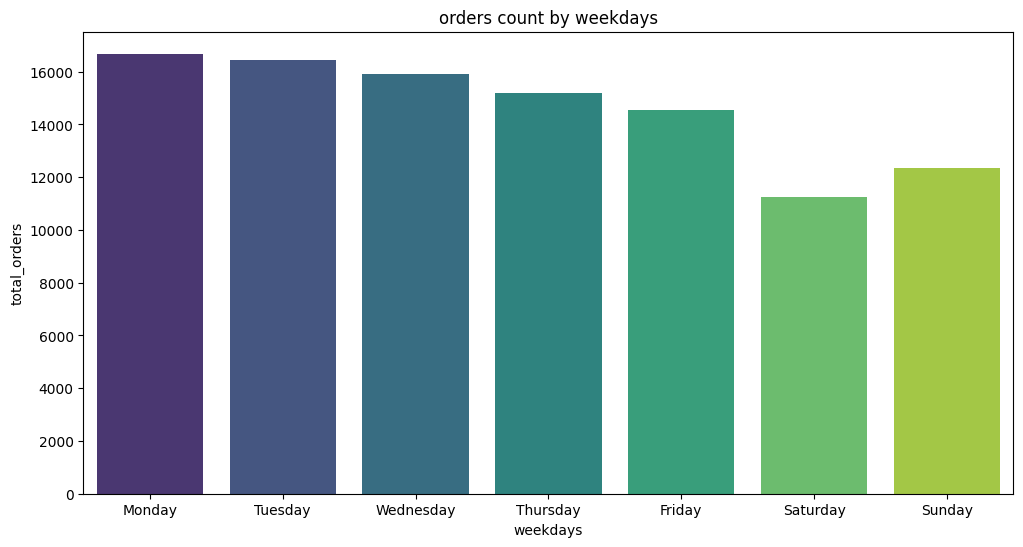

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(data=weekday_orders, x="weekdays", y="total_orders", palette="viridis")

# Customizing the chart
plt.xlabel("weekdays")
plt.ylabel("total_orders")
plt.title("orders count by weekdays")

# Show plot
plt.show()

In [32]:
cleaned_data.head(1)

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,product_id,...,payment_installments,payment_value,review_score,product_category_name_english,month,day,time,hour,weekday_number,weekday_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05 00:00:00,a9516a079e37a9c9c36b9b78b10169e8,...,2,146.87,4.0,office_furniture,5,16,1900-01-01 15:05:35,15,1,Tuesday


In [33]:
high_value_customers = db.query('''
select customer_unique_id,sum(price) as total_purchased_amount,count(order_id) as order_count
from cleaned_data
group by customer_unique_id
order by total_purchased_amount desc
''').df()

high_value_customers.head()

,customer_unique_id,total_purchased_amount,order_count
0,da122df9eeddfedc1dc1f5349a1a690c,7388.0,2
1,dc4802a71eae9be1dd28f5d788ceb526,6735.0,1
2,459bef486812aa25204be022145caa62,6729.0,1
3,ff4159b92c40ebe40454e3e6a7c35ed6,6499.0,1
4,eebb5dda148d3893cdaf5b5ca3040ccb,4690.0,1


In [34]:
s = db.query('''
select sum(total_purchased_amount)
from high_value_customers
where total_purchased_amount <= 200
''').df()
s.head()


,sum(total_purchased_amount)
0,6.539252e+06


In [35]:
(high_value_customers['total_purchased_amount']).count()

np.int64(95419)

In [36]:
(high_value_customers['total_purchased_amount'] <= 500).sum()

np.int64(92117)

In [37]:
((high_value_customers['total_purchased_amount'] <= 1000)&(high_value_customers['total_purchased_amount'] > 500)).sum()

np.int64(2451)

In [38]:
((high_value_customers['total_purchased_amount'] < 2000)&(high_value_customers['total_purchased_amount'] > 1000)).sum()

np.int64(723)

In [39]:
((high_value_customers['total_purchased_amount'] < 3000)&(high_value_customers['total_purchased_amount'] >= 2000)).sum()

np.int64(100)

In [40]:
(high_value_customers['total_purchased_amount'] >= 3000).sum()

np.int64(28)

In [41]:
high_value_customers['total_purchased_amount'] = pd.to_numeric(high_value_customers['total_purchased_amount'], errors='coerce')

<Axes: ylabel='total_purchased_amount'>

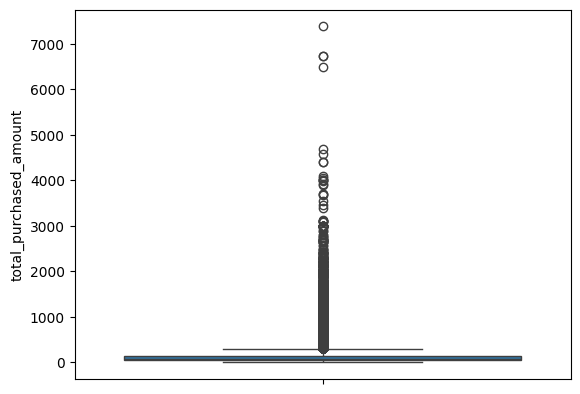

In [42]:
sns.boxplot(high_value_customers['total_purchased_amount'])

In [43]:
high_value_customers['spending_category'] = np.where(high_value_customers['total_purchased_amount'] < 50, 'Low',
                           np.where(high_value_customers['total_purchased_amount'] > 2000, 'High', 'Medium'))

In [44]:
q = '''select spending_category,sum(total_purchased_amount) as total_amount from high_value_customers 
group by spending_category
order by sum(total_purchased_amount) desc
'''
customer_segmentation = db.query(q).df()
customer_segmentation.head()

,spending_category,total_amount
0,Medium,1.144541e+07
1,Low,9.386232e+05
2,High,3.598437e+05


C:\Users\hp\AppData\Local\Temp\ipykernel_9760\708571597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_segmentation, x="spending_category", y="total_amount", palette="viridis")


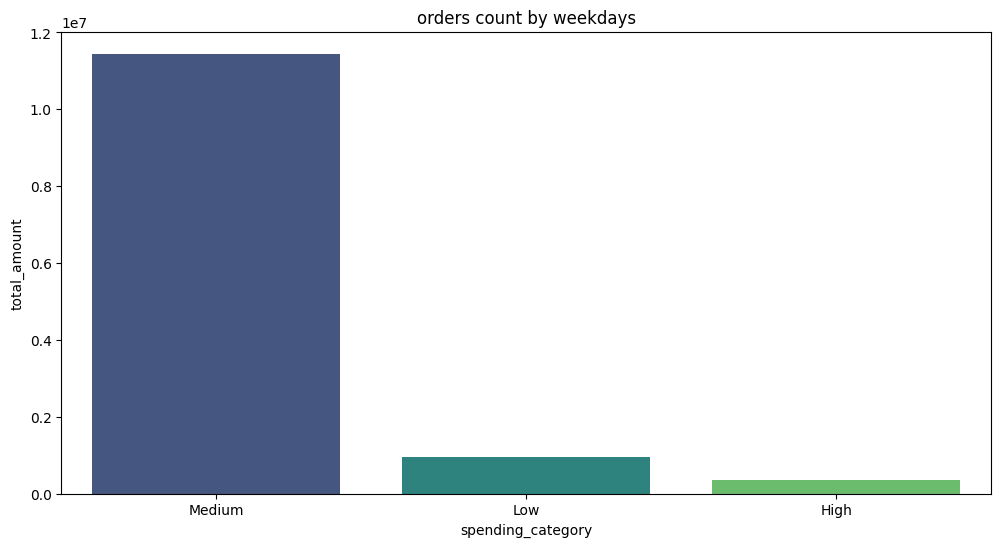

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_segmentation, x="spending_category", y="total_amount", palette="viridis")

# Customizing the chart
plt.xlabel("spending_category")
plt.ylabel("total_amount")
plt.title("orders count by weekdays")

# Show plot
plt.show()

In [46]:
high_value_customers.head()

,customer_unique_id,total_purchased_amount,order_count,spending_category
0,da122df9eeddfedc1dc1f5349a1a690c,7388.0,2,High
1,dc4802a71eae9be1dd28f5d788ceb526,6735.0,1,High
2,459bef486812aa25204be022145caa62,6729.0,1,High
3,ff4159b92c40ebe40454e3e6a7c35ed6,6499.0,1,High
4,eebb5dda148d3893cdaf5b5ca3040ccb,4690.0,1,High


In [47]:
top_20percent = db.query('''SELECT 
    (SELECT SUM(total_purchased_amount) 
     FROM (SELECT total_purchased_amount 
           FROM high_value_customers 
           ORDER BY total_purchased_amount DESC 
           LIMIT 19083) AS top_20) AS top_20_revenue,

    (SELECT SUM(total_purchased_amount) 
     FROM (SELECT total_purchased_amount 
           FROM high_value_customers 
           ORDER BY total_purchased_amount ASC 
           LIMIT 76336) AS bottom_80) AS bottom_80_revenue;
''').df()
top_20percent.head()

,top_20_revenue,bottom_80_revenue
0,7.184069e+06,5.559810e+06


In [48]:
data = {
    "Top 20% Customers": top_20percent['top_20_revenue'][0],
    "Bottom 80% Customers": top_20percent['bottom_80_revenue'][0]
}
top_20percent = pd.DataFrame(list(data.items()), columns=["Customer Group", "Total Revenue"])
print(top_20percent)



         Customer Group  Total Revenue
0     Top 20% Customers   7.184069e+06
1  Bottom 80% Customers   5.559810e+06


C:\Users\hp\AppData\Local\Temp\ipykernel_9760\3435191365.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20percent, x="Customer Group", y="Total Revenue", palette="viridis")


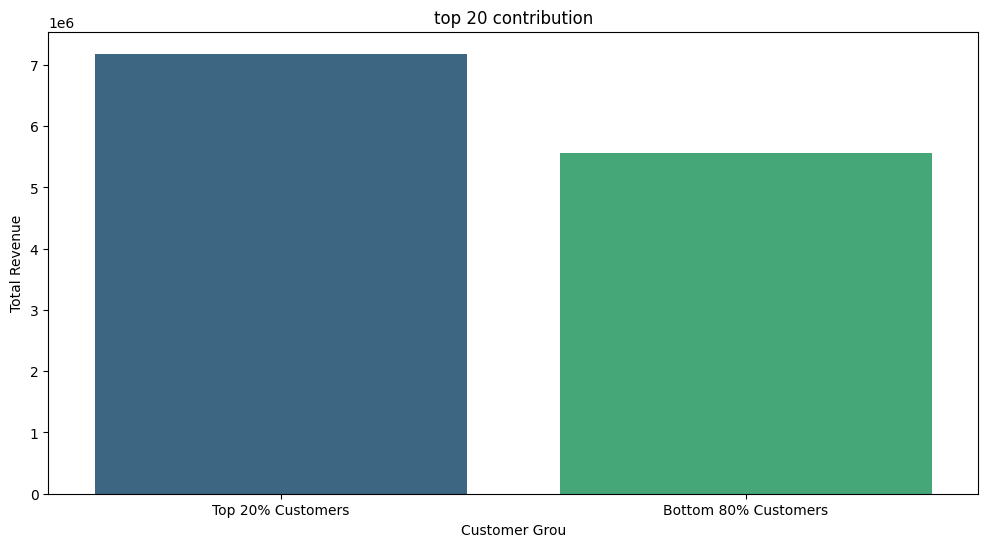

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20percent, x="Customer Group", y="Total Revenue", palette="viridis")

# Customizing the chart
plt.xlabel("Customer Grou")
plt.ylabel("Total Revenue")
plt.title("top 20 contribution")

# Show plot
plt.show()


In [50]:
average_revenue = db.query(
'''select customer_unique_id,total_orders,total_revenue / total_orders as average_order_value,total_orders*average_order_value as total_spendings
from(select customer_unique_id,count(order_id) as total_orders,sum(price) as total_revenue
from cleaned_data
group by customer_unique_id)
order by total_orders desc
''').df()
average_revenue.head()

,customer_unique_id,total_orders,average_order_value,total_spendings
0,8d50f5eadf50201ccdcedfb9e2ac8455,16,45.601250,729.62
1,3e43e6105506432c953e165fb2acf44c,13,75.688462,983.95
2,1b6c7548a2a1f9037c1fd3ddfed95f33,9,89.912222,809.21
3,ca77025e7201e3b30c44b472ff346268,9,85.960000,773.64
4,6469f99c1f9dfae7733b25662e7f1782,8,79.912500,639.30


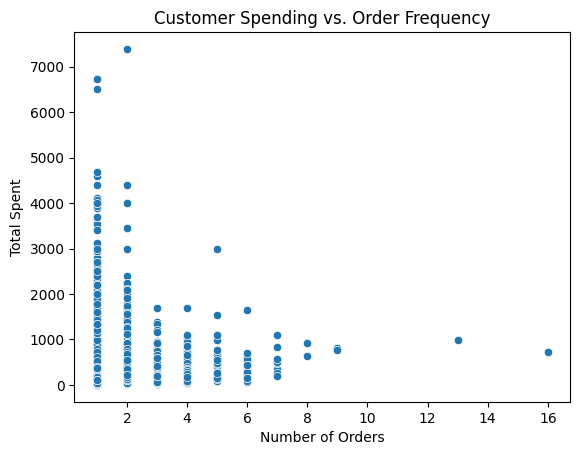

In [51]:
sns.scatterplot(x="total_orders", y="total_spendings", data=average_revenue)
plt.title("Customer Spending vs. Order Frequency")
plt.xlabel("Number of Orders")
plt.ylabel("Total Spent")
plt.show()

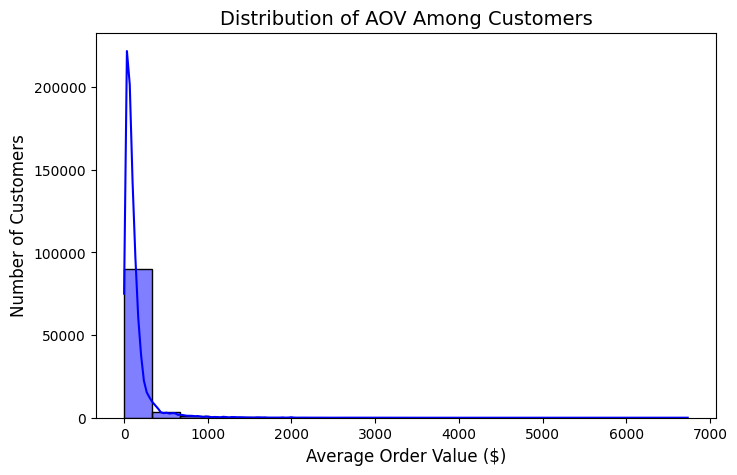

In [52]:
plt.figure(figsize=(8, 5))
sns.histplot(average_revenue["average_order_value"], bins=20, kde=True, color="blue")

plt.title("Distribution of AOV Among Customers", fontsize=14)
plt.xlabel("Average Order Value ($)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_9760\663320347.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers["customer_unique_id"], y=top_customers["total_spendings"], palette="Blues_r")


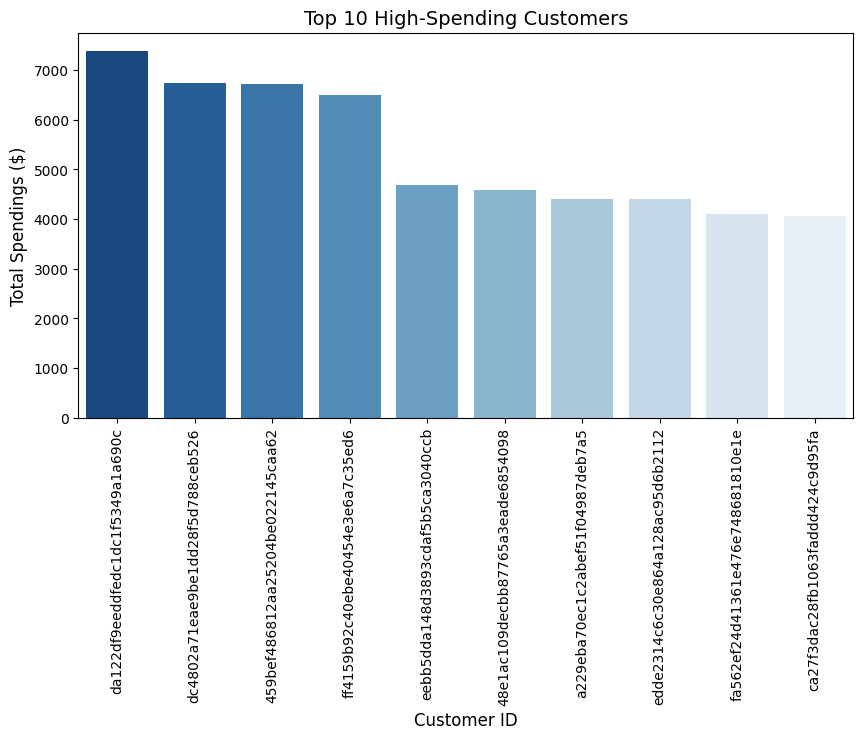

In [53]:
top_customers = average_revenue.nlargest(10, "total_spendings")  # Top 10 customers

plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers["customer_unique_id"], y=top_customers["total_spendings"], palette="Blues_r")

plt.xticks(rotation=90)
plt.title("Top 10 High-Spending Customers", fontsize=14)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Total Spendings ($)", fontsize=12)
plt.show()

In [54]:
seller_performance = db.query('''
select seller_id,sum(price) as total_amount,count(order_id) as total_orders
from cleaned_data
group by seller_id
order by total_amount desc

''').df()
seller_performance.head()

,seller_id,total_amount,total_orders
0,4869f7a5dfa277a7dca6462dcf3b52b2,227406.24,1143
1,53243585a1d6dc2643021fd1853d8905,208199.61,358
2,fa1c13f2614d7b5c4749cbc52fecda94,194042.03,586
3,4a3ca9315b744ce9f8e9374361493884,191178.72,1889
4,7e93a43ef30c4f03f38b393420bc753a,176147.91,338


In [55]:
seller_performance['total_amount'].sum()/cleaned_data['price'].sum() * 100

np.float64(99.99999999999997)

In [56]:
cleaned_data['price'].sum()

np.float64(12743879.009999998)

In [57]:
seller_performance['seller_id'].count()

np.int64(3095)

In [58]:
cleaned_data['order_delivered_customer_date'] = pd.to_datetime(cleaned_data['order_delivered_customer_date'])

In [59]:
cleaned_data['delivery_time_taken'] = cleaned_data['order_delivered_customer_date']-cleaned_data['order_purchase_timestamp']

In [60]:
seller_delivery_time = cleaned_data.groupby('seller_id')['delivery_time_taken'].mean().dt.days.reset_index()
seller_delivery_time.head(10)

,seller_id,delivery_time_taken
0,0015a82c2db000af6aaaf3ae2ecb0532,10.0
1,001cca7ae9ae17fb1caed9dfb1094831,13.0
2,001e6ad469a905060d959994f1b41e4f,NaN
3,002100f778ceb8431b7a1020ff7ab48f,16.0
4,003554e2dce176b5555353e4f3555ac8,4.0
5,004c9cd9d87a3c30c522c48c4fc07416,14.0
6,00720abe85ba0859807595bbf045a33b,10.0
7,00ab3eff1b5192e5f1a63bcecfee11c8,9.0
8,00d8b143d12632bad99c0ad66ad52825,7.0
9,00ee68308b45bc5e2660cd833c3f81cc,9.0


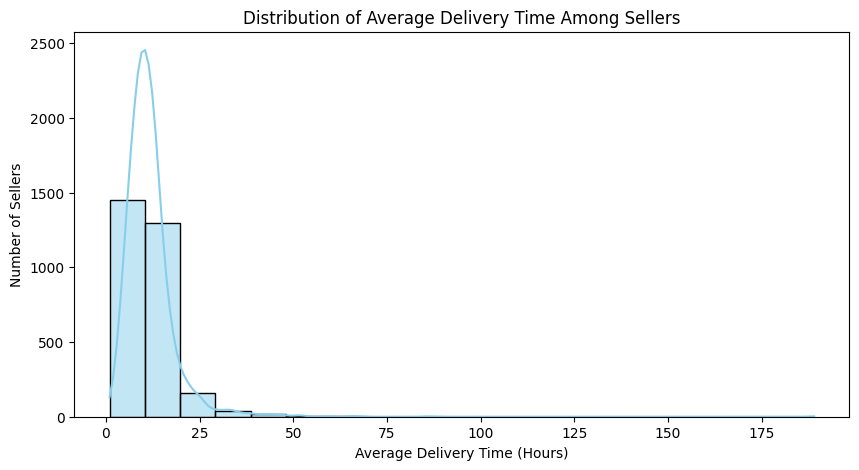

In [61]:
plt.figure(figsize=(10, 5))
sns.histplot(seller_delivery_time['delivery_time_taken'], bins=20, kde=True, color='skyblue')
plt.xlabel('Average Delivery Time (Hours)')
plt.ylabel('Number of Sellers')
plt.title('Distribution of Average Delivery Time Among Sellers')
plt.show()

In [62]:
top_sellers = db.query('''
WITH SellerRevenue AS (
    SELECT 
        seller_id, 
        SUM(price) AS total_revenue
    FROM cleaned_data
    GROUP BY seller_id
), RankedSellers AS (
    SELECT 
        seller_id,
        total_revenue,
        SUM(total_revenue) OVER (ORDER BY total_revenue DESC) AS rolling_revenue,
        SUM(total_revenue) OVER () AS total_sales
    FROM SellerRevenue
)
SELECT seller_id, total_revenue
FROM RankedSellers
WHERE rolling_revenue <= 0.8 * total_sales ''').df()
top_sellers.head()


,seller_id,total_revenue
0,4869f7a5dfa277a7dca6462dcf3b52b2,227406.24
1,53243585a1d6dc2643021fd1853d8905,208199.61
2,fa1c13f2614d7b5c4749cbc52fecda94,194042.03
3,4a3ca9315b744ce9f8e9374361493884,191178.72
4,7e93a43ef30c4f03f38b393420bc753a,176147.91


In [63]:
top_sellers.count()

seller_id        534
total_revenue    534
dtype: int64

In [64]:
top_sellers['total_revenue'].sum()

np.float64(10190819.619999995)

In [65]:
cleaned_data['price'].sum()

np.float64(12743879.009999998)

In [66]:
top_sellers['total_revenue'].sum()/cleaned_data['price'].sum() * 100

np.float64(79.96638709456798)

In [67]:
#only 534 sellers contribute to the 80 percent of sale
cleaned_data['seller_id'].nunique()

3095

In [68]:
534/3095 * 100


17.253634894991922

In [69]:
seller_performance.columns


Index(['seller_id', 'total_amount', 'total_orders'], dtype='object')

In [70]:
seller_performance['cumulative_percentage'] = seller_performance['total_amount'].cumsum() / seller_performance['total_amount'].sum() * 100

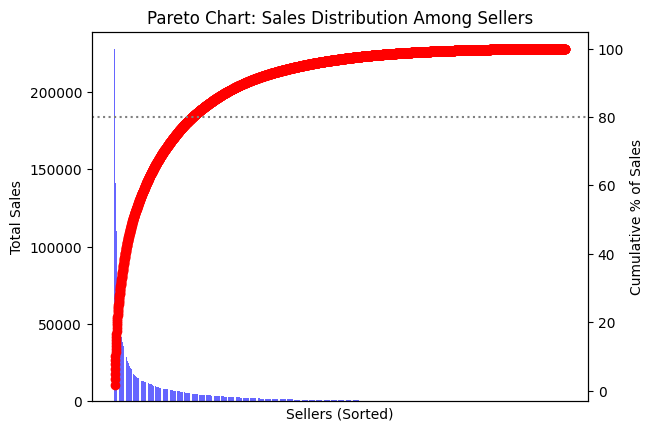

In [71]:
# Plot Pareto Chart
fig, ax1 = plt.subplots()

# Bar Chart for Sales
ax1.bar(seller_performance.index, seller_performance['total_amount'], color='blue', alpha=0.6)
ax1.set_ylabel('Total Sales')
ax1.set_xlabel('Sellers (Sorted)')
ax1.set_xticks([])

# Line Plot for Cumulative Percentage
ax2 = ax1.twinx()
ax2.plot(seller_performance.index, seller_performance['cumulative_percentage'], color='red', marker='o', linestyle='dashed')
ax2.axhline(y=80, color='gray', linestyle='dotted')  # Mark 80% Line
ax2.set_ylabel('Cumulative % of Sales')

plt.title("Pareto Chart: Sales Distribution Among Sellers")
plt.show()

In [72]:
cleaned_data.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'product_id', 'price', 'freight_value', 'seller_id', 'seller_state',
       'payment_type', 'payment_installments', 'payment_value', 'review_score',
       'product_category_name_english', 'month', 'day', 'time', 'hour',
       'weekday_number', 'weekday_name', 'delivery_time_taken'],
      dtype='object')

In [73]:
#sales and price corelation
corelation = db.query('''
SELECT 
    product_id, 
    AVG(price) AS avg_price, 
    COUNT(order_id) AS total_sales
FROM cleaned_data
GROUP BY product_id ''').df()
corelation.head()

,product_id,avg_price,total_sales
0,e8316a4667e5870c85e906b1f062bde1,83.045556,18
1,bdc3291ab242ec1effc8eb0987850268,27.777632,38
2,43f88c8353708451babf9bcdd1fda92a,54.636842,19
3,f6e0a9ce8a6e91c3a0ca2d3005911d20,84.900000,1
4,35afc973633aaeb6b877ff57b2793310,87.723013,156


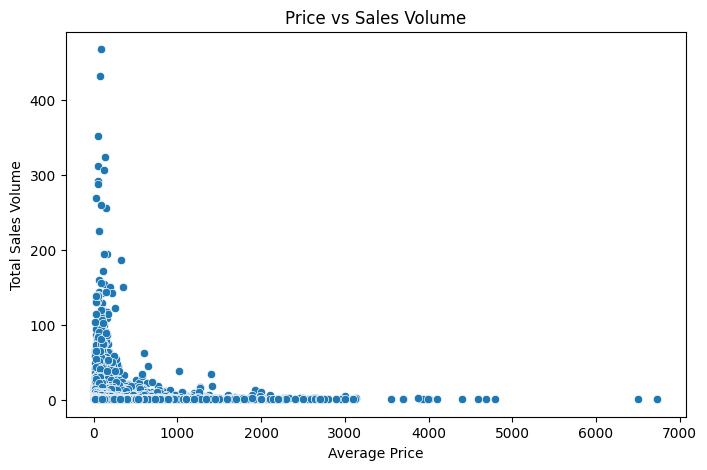

Correlation: -0.03, P-value: 0.00000


In [75]:

from scipy.stats import pearsonr
plt.figure(figsize=(8, 5))
sns.scatterplot(x=corelation['avg_price'], y=corelation['total_sales'])
plt.xlabel("Average Price")
plt.ylabel("Total Sales Volume")
plt.title("Price vs Sales Volume")
plt.show()

# Calculate correlation
correlation, p_value = pearsonr(corelation['avg_price'], corelation['total_sales'])
print(f"Correlation: {correlation:.2f}, P-value: {p_value:.5f}")

## Geographical Insights
This section focuses on regional sales, customer locations, and shipping efficiency.
- **Top-Selling Locations:** Identifies cities/states with high sales.
- **Customer Distribution:** Maps where high-spending customers live.
- **Shipping Times:** Compares average delivery times across regions.

In [89]:
#geographical insights
#top selling locations
top_selling_loc = db.query('''
select customer_city,customer_state,count(order_id) as total_orders
from cleaned_data
group by customer_city,customer_state
order by total_orders desc''').df()
top_selling_loc.head()


,customer_city,customer_state,total_orders
0,sao paulo,SP,16076
1,rio de janeiro,RJ,7066
2,belo horizonte,MG,2858
3,brasilia,DF,2202
4,curitiba,PR,1558


C:\Users\hp\AppData\Local\Temp\ipykernel_9760\545687891.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_selling_loc_top10, x='customer_city', y='total_orders', palette='coolwarm')


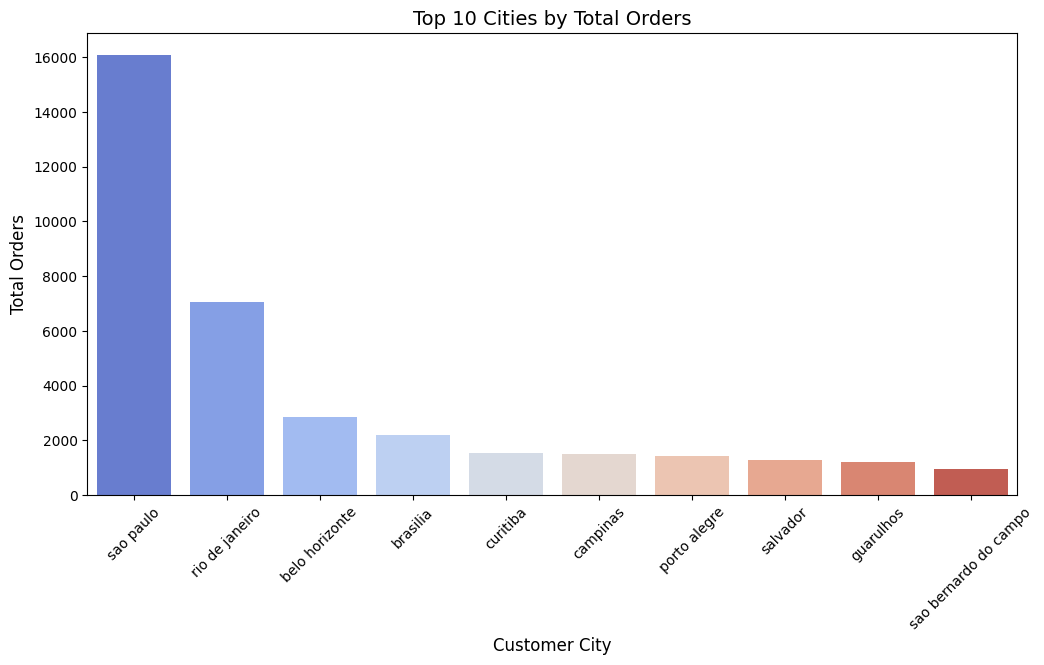

In [96]:
# Select the top 10 cities with the most orders
top_selling_loc_top10 = top_selling_loc.head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_selling_loc_top10, x='customer_city', y='total_orders', palette='coolwarm')

# Titles and Labels
plt.xlabel('Customer City', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.title('Top 10 Cities by Total Orders', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show Plot
plt.show()

In [86]:
top_spending_cus_loc = db.query(
    '''
    SELECT customer_city, customer_state, SUM(payment_value) AS total_spent
FROM cleaned_data
GROUP BY customer_city, customer_state
ORDER BY total_spent DESC;

    '''
).df()
top_spending_cus_loc.head()

,customer_city,customer_state,total_spent
0,sao paulo,SP,2292336.67
1,rio de janeiro,RJ,1195858.38
2,belo horizonte,MG,429633.28
3,brasilia,DF,372858.21
4,curitiba,PR,252804.16


C:\Users\hp\AppData\Local\Temp\ipykernel_9760\4039569512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_spending_cus_loc_top10, x='customer_city', y='total_spent', palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sao paulo'),
  Text(1, 0, 'rio de janeiro'),
  Text(2, 0, 'belo horizonte'),
  Text(3, 0, 'brasilia'),
  Text(4, 0, 'curitiba'),
  Text(5, 0, 'porto alegre'),
  Text(6, 0, 'campinas'),
  Text(7, 0, 'salvador'),
  Text(8, 0, 'guarulhos'),
  Text(9, 0, 'niteroi')])

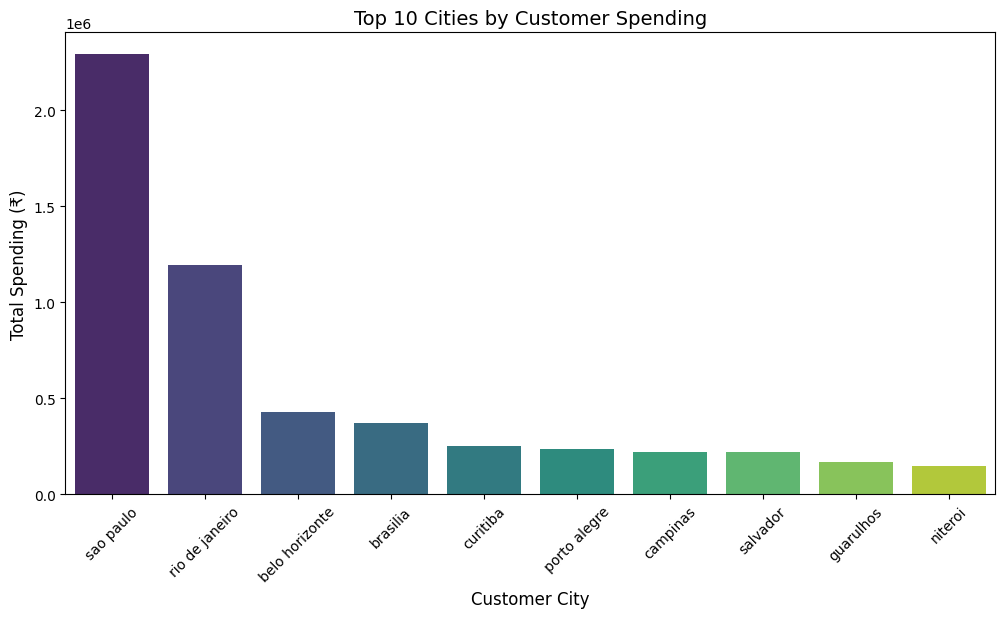

In [95]:
# Select the top 10 highest-spending cities
top_spending_cus_loc_top10 = top_spending_cus_loc.head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_spending_cus_loc_top10, x='customer_city', y='total_spent', palette='viridis')

# Titles and Labels
plt.xlabel('Customer City', fontsize=12)
plt.ylabel('Total Spending (₹)', fontsize=12)
plt.title('Top 10 Cities by Customer Spending', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

In [93]:
shipping_time_region = db.query(
    '''
    SELECT 
    customer_state, 
    AVG(EXTRACT(EPOCH FROM delivery_time_taken) / 86400) AS avg_shipping_time_days
FROM cleaned_data
GROUP BY customer_state
ORDER BY avg_shipping_time_days ASC
    '''
).df()
shipping_time_region.head()

,customer_state,avg_shipping_time_days
0,SP,8.727603
1,PR,11.922308
2,MG,11.973824
3,DF,12.858441
4,SC,14.937690


C:\Users\hp\AppData\Local\Temp\ipykernel_9760\1036469691.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shipping_time_region, x='customer_state', y='avg_shipping_time_days', palette='viridis')


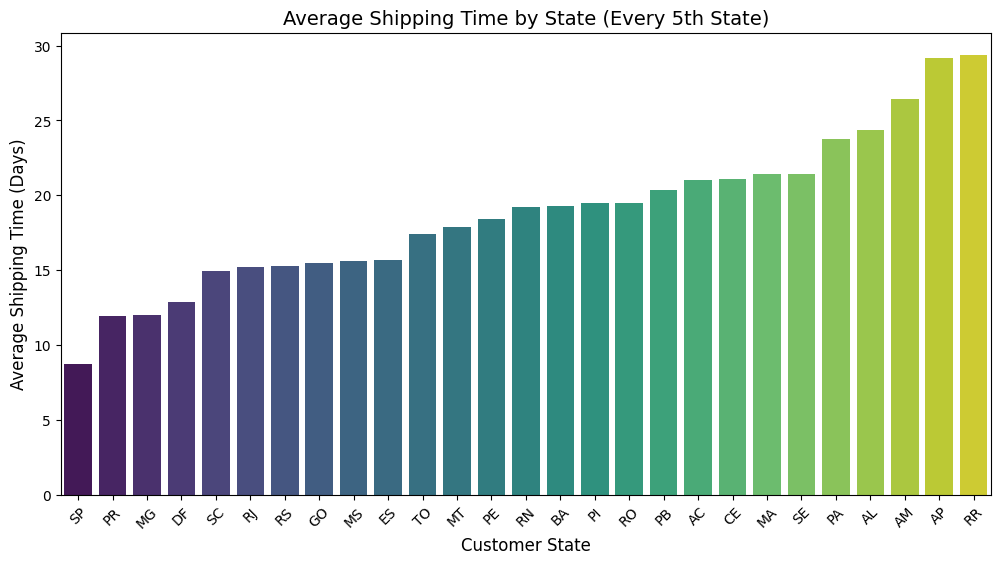

In [94]:

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=shipping_time_region, x='customer_state', y='avg_shipping_time_days', palette='viridis')

# Labels & Titles
plt.xlabel('Customer State', fontsize=12)
plt.ylabel('Average Shipping Time (Days)', fontsize=12)
plt.title('Average Shipping Time by State (Every 5th State)', fontsize=14)
plt.xticks(rotation=45)

# Show plot
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_9760\2370742424.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clv_data, x='customer_unique_id', y='customer_lifetime_value', palette='magma')


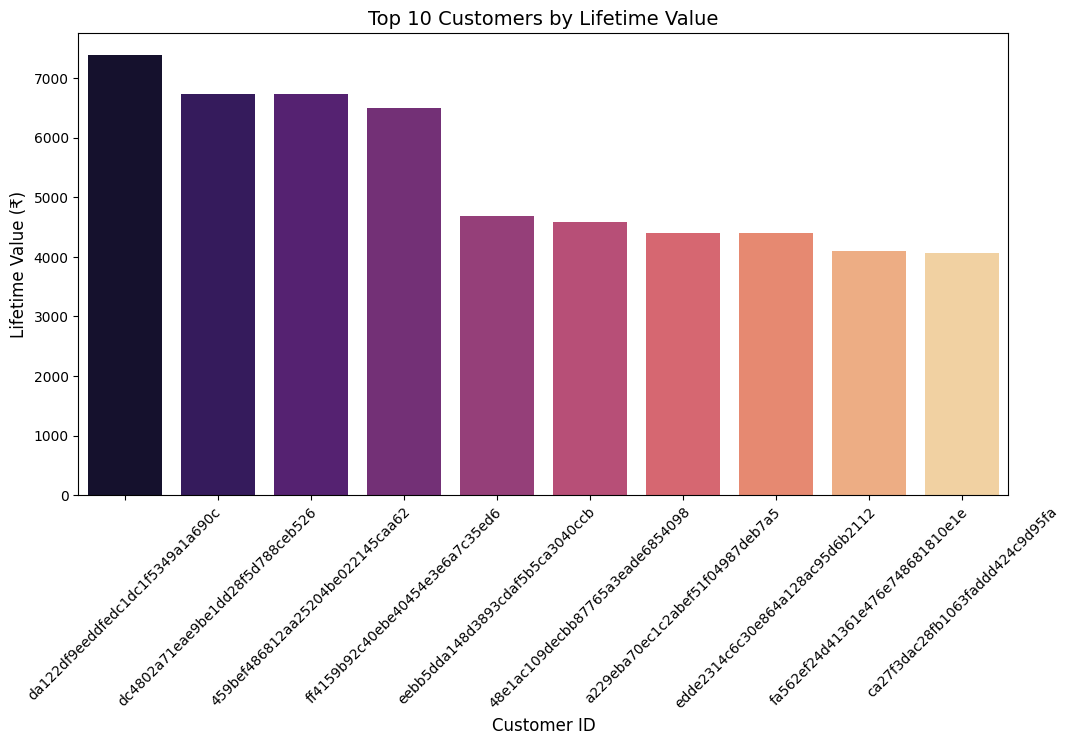

In [98]:
clv_data = db.query('''
    SELECT customer_unique_id, SUM(price) AS customer_lifetime_value
    FROM cleaned_data
    GROUP BY customer_unique_id
    ORDER BY customer_lifetime_value DESC
    LIMIT 10
''').df()


plt.figure(figsize=(12, 6))
sns.barplot(data=clv_data, x='customer_unique_id', y='customer_lifetime_value', palette='magma')

plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Lifetime Value (₹)', fontsize=12)
plt.title('Top 10 Customers by Lifetime Value', fontsize=14)
plt.xticks(rotation=45)  

plt.show()

## Conclusion
This project provided valuable business insights:
- **Customer behavior analysis:** Helps segment customers for better targeting.
- **Seller performance analysis:** Identifies top sellers and fulfillment efficiency.
- **Product & inventory insights:** Prevents stock issues and improves pricing strategies.
- **Geographical insights:** Helps in regional marketing and shipping optimization.
- **Profitability analysis:** Maximizes profit margins and marketing effectiveness.

**Next Steps:** Consider integrating machine learning for customer segmentation and demand forecasting.